Importing all necessary modules

In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


from keras.datasets import imdb

Loading IMDB data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


Vectorizing the data

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

Building the model with two hidden layers, 16 hidden units, and the RELU activation function

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Building the model with two hidden layers, 16 hidden units, and the relu activation function

In [7]:
model = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Model compilation using the binary cross entropy loss function and the rnsprob optimizer

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5318 - acc: 0.7749 - val_loss: 0.3940 - val_acc: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3064 - acc: 0.9060 - val_loss: 0.3165 - val_acc: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2195 - acc: 0.9299 - val_loss: 0.2779 - val_acc: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1747 - acc: 0.9441 - val_loss: 0.2768 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1405 - acc: 0.9552 - val_loss: 0.3248 - val_acc: 0.8724
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1158 - acc: 0.9627 - val_loss: 0.3044 - val_acc: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0975 - acc: 0.9706 - val_loss: 0.3152 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0784 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plotting training and validation accuracy

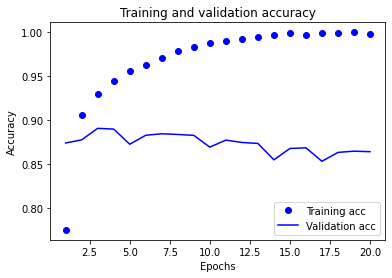

In [9]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plotting training and validation loss

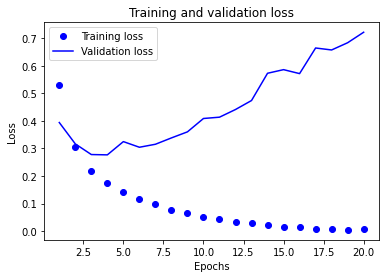

In [10]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Building model using one hidden layer with 16 hidden units and relu activation function

In [11]:
model_1 = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_1 = model_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_1 = model_1.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_1 ", results_1)
history_dict_1 = history_1.history
history_dict_1.keys()

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6146 - acc: 0.7425 - val_loss: 0.5624 - val_acc: 0.8078
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5160 - acc: 0.8429 - val_loss: 0.4988 - val_acc: 0.8349
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4549 - acc: 0.8689 - val_loss: 0.4527 - val_acc: 0.8524
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4090 - acc: 0.8837 - val_loss: 0.4190 - val_acc: 0.8610
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3735 - acc: 0.8941 - val_loss: 0.3926 - val_acc: 0.8675
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3450 - acc: 0.9027 - val_loss: 0.3723 - val_acc: 0.8721
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3219 - acc: 0.9083 - val_loss: 0.3558 - val_acc: 0.8756
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3024 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Building model using three hidden layer with 16 hidden units and relu activation function

In [13]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_2 = model_2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_2 = model_2.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_2 ", results_2)
history_dict_2 = history_2.history
history_dict_2.keys()

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5290 - acc: 0.7958 - val_loss: 0.4031 - val_acc: 0.8586
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3103 - acc: 0.9051 - val_loss: 0.3099 - val_acc: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2219 - acc: 0.9260 - val_loss: 0.2762 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1696 - acc: 0.9448 - val_loss: 0.2751 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1369 - acc: 0.9557 - val_loss: 0.2882 - val_acc: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1089 - acc: 0.9667 - val_loss: 0.3073 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0902 - acc: 0.9723 - val_loss: 0.3558 - val_acc: 0.8794
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0778 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Let's try it now with 32 hidden units rather than 16 and one hidden layer.

In [15]:
model_3 = models.Sequential()
model_3.add(layers.Dense(32,  activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_3 = model_3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_3 = model_3.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_3 ", results_3)
history_dict_3 = history_3.history
history_dict_3.keys()

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.4912 - acc: 0.8006 - val_loss: 0.4015 - val_acc: 0.8386
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2969 - acc: 0.9063 - val_loss: 0.3083 - val_acc: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2243 - acc: 0.9293 - val_loss: 0.2799 - val_acc: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1836 - acc: 0.9403 - val_loss: 0.2743 - val_acc: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1519 - acc: 0.9537 - val_loss: 0.2798 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1293 - acc: 0.9613 - val_loss: 0.2930 - val_acc: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1110 - acc: 0.9683 - val_loss: 0.3272 - val_acc: 0.8724
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0981 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets try with 64 units and one hidden layer


In [17]:
model_4 = models.Sequential()
model_4.add(layers.Dense(64,  activation='relu', input_shape=(10000,)))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_4 = model_4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_4 = model_4.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_4 ", results_4)
history_dict_4 = history_4.history
history_dict_4.keys()

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.4637 - acc: 0.7870 - val_loss: 0.3339 - val_acc: 0.8805
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2642 - acc: 0.9113 - val_loss: 0.3141 - val_acc: 0.8714
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2010 - acc: 0.9328 - val_loss: 0.2734 - val_acc: 0.8927
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1582 - acc: 0.9479 - val_loss: 0.2899 - val_acc: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1336 - acc: 0.9555 - val_loss: 0.2914 - val_acc: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1079 - acc: 0.9671 - val_loss: 0.3149 - val_acc: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0916 - acc: 0.9726 - val_loss: 0.3176 - val_acc: 0.8782
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0745 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets replace binary_crossentropy loss function with mse

In [19]:
model_5 = models.Sequential()
model_5.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_5.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_5.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history_5 = model_5.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_5 = model_5.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_5 ", results_5)
history_dict_5 = history_5.history
history_dict_5.keys()

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.1626 - acc: 0.8055 - val_loss: 0.1207 - val_acc: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0933 - acc: 0.9038 - val_loss: 0.0968 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0700 - acc: 0.9297 - val_loss: 0.0890 - val_acc: 0.8867
Epoch 4/20
 7/30 [======>.......................] - ETA: 1s - loss: 0.0571 - acc: 0.949

Instead of relu, Using tanh function 

In [ ]:
model_6 = models.Sequential()
model_6.add(layers.Dense(16,  activation='tanh', input_shape=(10000,)))
model_6.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_6 = model_6.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_6= model_6.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_6 ", results_6)
history_dict_6 = history_6.history
history_dict_6.keys()

Using drop out for three hidden layers with 64 units, MSE loss function and RELU

In [ ]:
model_7 = models.Sequential()
model_7.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_7.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history_7 = model_7.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_7= model_7.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_7 ", results_7)
history_dict_7 = history_7.history
history_dict_7.keys()

one layer with drop out of 0.5

In [ ]:
model_8 = models.Sequential()
model_8.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_8.add(layers.Dropout(0.5))
model_8.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_8 = model_8.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_8= model_8.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_8 ", results_8)
history_dict_8 = history_8.history
history_dict_8.keys()

Using l1 regulariser

In [ ]:
model_9 = models.Sequential()
model_9.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model_9.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_9.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_9 = model_9.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_9= model_9.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_9 ", results_9)
history_dict_9 = history_9.history
history_dict_9.keys()

Using l2 regulariser

In [ ]:
model_10 = models.Sequential()
model_10.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L2(0.01),input_shape=(10000,)))
model_10.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_10.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_10 = model_10.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_10= model_10.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_10 ", results_10)
history_dict_10 = history_10.history
history_dict_10.keys()

Instead of rmsprop, Using adam optimizer 

In [ ]:
model_11= models.Sequential()
model_11.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model_11.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_11 = model_11.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_11= model_11.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_11 ", results_11)
history_dict_11 = history_11.history
history_dict_11.keys()